# UAS Artificial Intelligence

#### Disusun oleh:
1. Raihana Khalika Putri (3.34.21.3.20)
2. Syalita Widyandini (3.34.21.3.23)

### **Import Library**

**Menambahkan Library untuk Data Manipulation dan Data Visualization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

### **Data Understanding**

* Dataset berisi daftar harga kosmetik beserta kandungan dan tipe kulit penggunanya. Dataset dapat di download pada tautan berikut : https://www.kaggle.com/datasets/kingabzpro/cosmetics-datasets
* Memberikan informasi seperti jumlah data, missing value, duplikasi data, korelasi antar kolom, dan sebaran data.
* Melakukan data manipulation untuk mendapatkan variabel atau fitur baru
* Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

### **Load Dataset**

In [83]:
data = pd.read_csv("cosmetics.csv")
data.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


**Informasi Tentang Kolom**
<ol>
    <li><b>Label</b>: Tipe produk</li>
    <li><b>Brand</b>: Nama Brand</li>
    <li><b>Name</b>: Nama produk</li>
    <li><b>Price</b>: Harga kosmetik dalam USD</li>
    <li><b>Rank</b>: Ranking produk</li>
    <li><b>Ingredients</b>: Kandungan produk</li>
    <li><b>Combination</b>: Ketersediaan produk untuk kombinasi tipe kulit kering dan berminyak</li>
    <li><b>Dry</b>: Ketersediaan produk untuk tipe kulit kering</li>
    <li><b>Normal</b>: Ketersediaan produk untuk tipe kulit normal</li>
    <li><b>Oily</b>: Ketersediaan produk untuk tipe kulit berminyak</li>
    <li><b>Sensitive</b>: Ketersediaan produk untuk tipe kulit sensitif</li>
</ol>

### **Properti Data**

In [84]:
data.dtypes

Label           object
Brand           object
Name            object
Price            int64
Rank           float64
Ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object

In [85]:
data.shape

(1472, 11)

In [86]:
data.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


**Harga (Price) dalam USD perlu dikonversi dalam Rupiah. 1 USD = Rp 15075.35 (July 2023), sehingga perlu mengalikan prize dengan 15075.35**

In [87]:
data['Price'] = data['Price'] * 15075.35

In [88]:
data.rename(columns={'Price': 'Price (in IDR)'}, inplace=True)

### **Cek missing value & data duplication**



In [89]:
data.isnull().sum()

Label             0
Brand             0
Name              0
Price (in IDR)    0
Rank              0
Ingredients       0
Combination       0
Dry               0
Normal            0
Oily              0
Sensitive         0
dtype: int64

In [90]:
data.duplicated().sum()

0

**Dataset yang dipakai sudah bersih dari nilai Null dan terbebas dari duplikasi data**

### **Exploratory Data Analysis**

**Melihat Korelasi Antar Kolom**

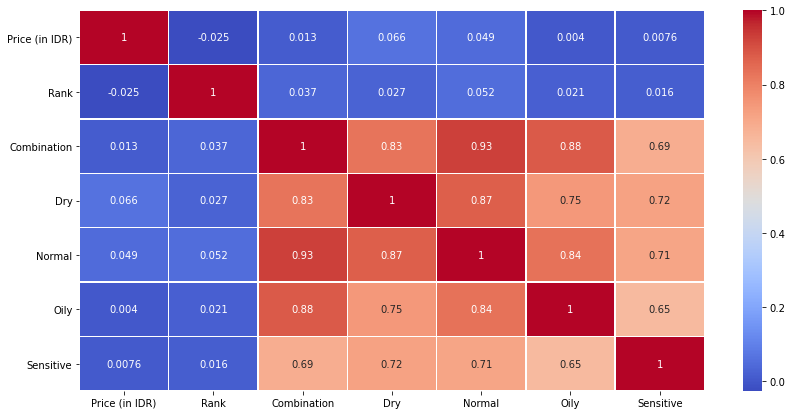

In [91]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

In [92]:
data.corr()['Price (in IDR)']

Price (in IDR)    1.000000
Rank             -0.025215
Combination       0.012575
Dry               0.065525
Normal            0.049230
Oily              0.003978
Sensitive         0.007621
Name: Price (in IDR), dtype: float64

**Menghapus Kolom yang tidak berkorelasi dengan Price**

In [93]:
data.drop(columns=['Name', 'Ingredients'], inplace=True)
data.head()

,Label,Brand,Price (in IDR),Rank,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,2638186.25,4.1,1,1,1,1,1
1,Moisturizer,SK-II,2698487.65,4.1,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,1025123.80,4.4,1,1,1,1,0
3,Moisturizer,LA MER,2638186.25,3.8,1,1,1,1,1
4,Moisturizer,IT COSMETICS,572863.30,4.1,1,1,1,1,1


**Mengganti Nama Kolom agar Mudah untuk Manipulasi Kolom**

In [94]:
data.rename(columns = {'Combination':'Combination_Skin', 'Dry':'Dry_Skin', 'Normal':'Normal_Skin',
                       'Oily':'Oily_Skin', 'Sensitive':'Sensitive_Skin'}, inplace = True)
data.head()

,Label,Brand,Price (in IDR),Rank,Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,2638186.25,4.1,1,1,1,1,1
1,Moisturizer,SK-II,2698487.65,4.1,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,1025123.80,4.4,1,1,1,1,0
3,Moisturizer,LA MER,2638186.25,3.8,1,1,1,1,1
4,Moisturizer,IT COSMETICS,572863.30,4.1,1,1,1,1,1


**Cek data kategorik yang ada di Kolom Combination_Skin, Dry_Skin, Normal_Skin, Oily_Skin, dan Sensitive_Skin**

In [97]:
data.Combination_Skin.unique()
data.Dry_Skin.unique()
data.Normal_Skin.unique()
data.Oily_Skin.unique()
data.Sensitive_Skin.unique()

array([1, 0], dtype=int64)

In [98]:
data.head()

,Label,Brand,Price (in IDR),Rank,Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,2638186.25,4.1,1,1,1,1,1
1,Moisturizer,SK-II,2698487.65,4.1,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,1025123.80,4.4,1,1,1,1,0
3,Moisturizer,LA MER,2638186.25,3.8,1,1,1,1,1
4,Moisturizer,IT COSMETICS,572863.30,4.1,1,1,1,1,1


In [99]:
data.corr()['Price (in IDR)']

Price (in IDR)      1.000000
Rank               -0.025215
Combination_Skin    0.012575
Dry_Skin            0.065525
Normal_Skin         0.049230
Oily_Skin           0.003978
Sensitive_Skin      0.007621
Name: Price (in IDR), dtype: float64

**Menghapus Kolom yang Korelasinya tidak terlalu signifikan terhadap Price**

In [100]:
data.drop(columns=['Rank'], inplace=True)
data.head()

,Label,Brand,Price (in IDR),Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,2638186.25,1,1,1,1,1
1,Moisturizer,SK-II,2698487.65,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,1025123.80,1,1,1,1,0
3,Moisturizer,LA MER,2638186.25,1,1,1,1,1
4,Moisturizer,IT COSMETICS,572863.30,1,1,1,1,1


**Cek Data Kategorik yang terdapat pada kolom Brand**

In [103]:
data.Brand.unique()

array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'DR. JART+', 'GLOW RECIPE', 'HERBIVORE',
       'TARTE', 'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE',
       'ESTÉE LAUDER', 'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'DIOR',
       'KORA ORGANICS', 'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO

**Karena data kategorik pada brand terlalu banyak, maka dilakukan penyederhanaan tipe Brand. Di sini, Brand yang ditampilkan adalah Brand yang jumlah datanya lebih dari 30 dalam dataset**

In [125]:
#Simple Brand Category
def setbrandcategory(text):
    if text == 'ALGENIST':
        return 'ALGENIST'
    elif text == 'CAUDALIE':
        return 'CAUDALIE'
    elif text == 'CLARINS':
        return 'CLARINS'
    elif text == 'CLINIQUE':
        return 'CLINIQUE'
    elif text == 'DIOR':
        return 'DIOR'
    elif text == 'DR. DENNIS GROSS SKINCARE':
        return 'DR. DENNIS GROSS SKINCARE'
    elif text == 'DR. JART+':
        return 'DR. JART+'
    elif text == 'ESTÉE LAUDER':
        return 'ESTÉE LAUDER'
    elif text == 'FIRST AID BEAUTY':
        return 'FIRST AID BEAUTY'
    elif text == 'FRESH':
        return 'FRESH'
    elif text == 'KATE SOMERVILLE':
        return 'KATE SOMERVILLE'
    elif text == 'LA MER':
        return 'LA MER'
    elif text == 'LANCÔME':
        return 'LANCÔME'
    elif text == 'MURAD':
        return 'MURAD'
    elif text == 'OLEHENRIKSEN':
        return 'OLEHENRIKSEN'
    elif text == 'ORIGINS':
        return 'ORIGINS'
    elif text == 'PERRICONE MD':
        return 'PERRICONE MD'
    elif text == 'PETER THOMAS ROTH':
        return 'PETER THOMAS ROTH'
    elif text == 'PHILOSOPHY':
        return 'PHILOSOPHY'
    elif text == 'SEPHORA COLLECTION':
        return 'SEPHORA COLLECTION'
    elif text == 'SHISEIDO':
        return 'SHISEIDO'
    else:
        return 'Other'
    
data['Brand'] = data['Brand'].apply(lambda x:setbrandcategory(x))
data.head()

,Label,Brand,Price (in IDR),Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,2.638186e+06,1,1,1,1,1
1,Moisturizer,Other,2.698488e+06,1,1,1,1,1
2,Moisturizer,Other,1.025124e+06,1,1,1,1,0
3,Moisturizer,LA MER,2.638186e+06,1,1,1,1,1
4,Moisturizer,Other,5.728633e+05,1,1,1,1,1


**Cek data kategorik yang terdapat pada kolom Label**

In [126]:
data.Label.unique()

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

**Karena data kategorik pada kolom Label tidak terlalu banyak, maka tidak perlu disederhanakan. Langsung ke langkah untuk melihat tipe datanya.**

In [127]:
data.dtypes

Label                object
Brand                object
Price (in IDR)      float64
Combination_Skin      int32
Dry_Skin              int32
Normal_Skin           int32
Oily_Skin             int32
Sensitive_Skin        int32
dtype: object

**Menyederhanakan Tipe Data dari Kolom Numerik**

In [128]:
data['Price (in IDR)'] = data['Price (in IDR)'].astype('float64')
data['Combination_Skin'] = data['Combination_Skin'].astype('int32')
data['Dry_Skin'] = data['Dry_Skin'].astype('int32')
data['Normal_Skin'] = data['Normal_Skin'].astype('int32')
data['Oily_Skin'] = data['Oily_Skin'].astype('int32')
data['Sensitive_Skin'] = data['Sensitive_Skin'].astype('int32')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             1472 non-null   object 
 1   Brand             1472 non-null   object 
 2   Price (in IDR)    1472 non-null   float64
 3   Combination_Skin  1472 non-null   int32  
 4   Dry_Skin          1472 non-null   int32  
 5   Normal_Skin       1472 non-null   int32  
 6   Oily_Skin         1472 non-null   int32  
 7   Sensitive_Skin    1472 non-null   int32  
dtypes: float64(1), int32(5), object(2)
memory usage: 63.4+ KB


In [129]:
data.head()

,Label,Brand,Price (in IDR),Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,2.638186e+06,1,1,1,1,1
1,Moisturizer,Other,2.698488e+06,1,1,1,1,1
2,Moisturizer,Other,1.025124e+06,1,1,1,1,0
3,Moisturizer,LA MER,2.638186e+06,1,1,1,1,1
4,Moisturizer,Other,5.728633e+05,1,1,1,1,1


**Melihat Sebaran Data dari Masing-Masing Kolom**

In [134]:
def pie_bool(data):
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
     
    label_label = ['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream', 'Sun protect']
    brand_label = ['ALGENIST', 'CAUDALIE', 'CLARINS', 'CLINIQUE', 'DIOR', 'DR. DENNIS GROSS SKINCARE', 'DR. JART+', 'ESTÉE LAUDER',
                   'FIRST AID BEAUTY', 'FRESH', 'KATE SOMERVILLE', 'LA MER', 'LANCÔME', 'MURAD', 'OLEHENRIKSEN', 'ORIGINS',
                   'PERRICONE MD', 'PETER THOMAS ROTH', 'PHILOSOPHY', 'SEPHORA COLLECTION', 'SHISEIDO', 'Other']

    values = data['Label'].value_counts().values
    fig.add_trace(go.Pie(labels=label_label, values=values, name="Label", title="Label"),1, 1)

    values = data['Brand'].value_counts().values
    fig.add_trace(go.Pie(labels=brand_label, values=values, name="Brand", title="Brand"),1, 2)

    fig.update_traces(hole=.55, hoverinfo="label+percent+name")

    fig.update_layout(title_text="Persebaran Data pada Kolom Label dan Brand", title_xanchor="auto")
    fig.show()

In [135]:
pie_bool(data)

<AxesSubplot:xlabel='Oily_Skin', ylabel='Count'>

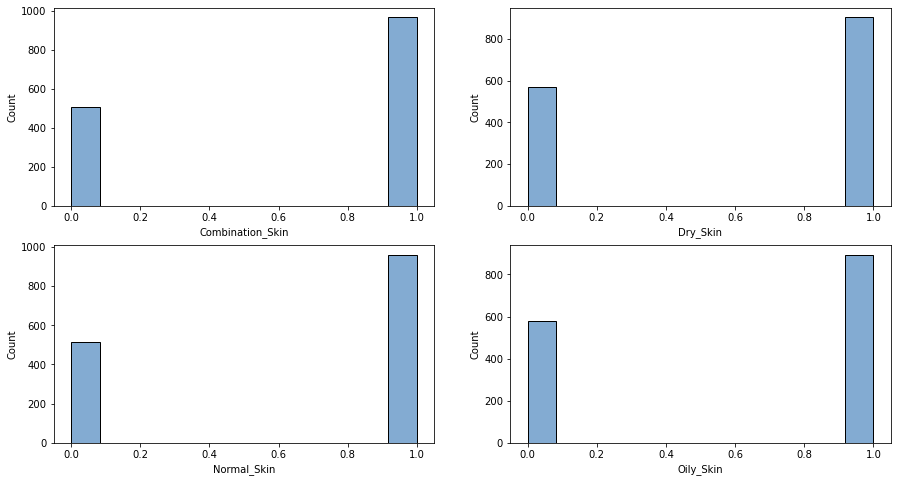

In [158]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data, x='Combination_Skin', ax=axes[0,0], color='#598fc4')
sns.histplot(data=data, x='Dry_Skin', ax=axes[0,1], color='#598fc4')
sns.histplot(data=data, x='Normal_Skin', ax=axes[1,0], color='#598fc4')
sns.histplot(data=data, x='Oily_Skin', ax=axes[1,1], color='#598fc4')

<AxesSubplot:xlabel='Sensitive_Skin', ylabel='Count'>

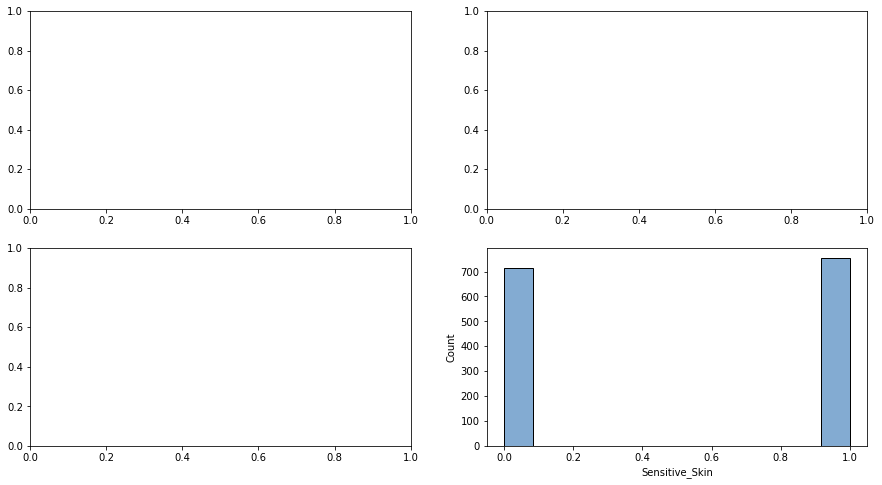

In [161]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
sns.histplot(data=data, x='Sensitive_Skin', ax=axes[1,1], color='#598fc4')

## **Data Preparation**
* Melakukan seleksi fitur yaitu membagi data fitur dan data label
* Membagi dataset menjadi data training dan data testing

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

**Membagi dataset menjadi data latih dan data uji dengan prosentasi 85 : 15**

In [138]:
#Split Train and Test Set
X = data.drop(columns=['Price (in IDR)'])
y = np.log(data['Price (in IDR)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Label,Brand,Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,1,1,1,1,1
1,Moisturizer,Other,1,1,1,1,1
2,Moisturizer,Other,1,1,1,1,0
3,Moisturizer,LA MER,1,1,1,1,1
4,Moisturizer,Other,1,1,1,1,1


In [139]:
X_train.shape, X_test.shape

((1251, 7), (221, 7))

## **Membangun Model**

* Memprediksi algoritma dengan performa terbaik menggunakan LazyPredict
* Membuat pipeline untuk memudahkan proses preprocessing model
*	Menggunakan ColumnTransformer untuk menggabungkan pipeline data numerik dan data kategorik
* Memilih 3 (tiga) algoritma dengan performa terbaik untuk di evaluasi
* Menambahkan parameter tunning pada 3 algoritma yang dipilih

In [140]:
!pip install lazypredict

In [141]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:16<00:00,  2.45it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearRegression,0.26,0.28,0.67,0.12
TransformedTargetRegressor,0.26,0.28,0.67,0.08
Lars,0.26,0.28,0.67,0.11
Ridge,0.26,0.28,0.67,0.09
RidgeCV,0.26,0.28,0.67,0.06
LassoLarsIC,0.26,0.28,0.67,0.11
ElasticNetCV,0.26,0.28,0.67,0.57
LassoLarsCV,0.26,0.28,0.67,0.18
LarsCV,0.26,0.28,0.67,0.18


**Menambahkan library dari 3 algoritma teratas**

In [144]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### **Memilih Hyperparameter**

**Menghapus kolom Label dan Price terlebih dahulu karena data kategorikal**

In [142]:
X = data.drop(columns=['Brand', 'Label', 'Price (in IDR)'])
y = np.log(data['Price (in IDR)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,0
3,1,1,1,1,1
4,1,1,1,1,1


**Mencari Hyperparameter Algoritma GradientBossting**

In [145]:
GB = GradientBoostingRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_features': [2, 3, 4, 5],
    'min_samples_split' : [10, 20, 30, 40],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf' : [3, 4, 5, 6]
}

gb_search = GridSearchCV(GB, parameters)

gb_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [70, 80, 90, 100, 200]})

In [146]:
print(gb_search.best_params_)

{'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 70}


**Mencari Hyperparameter Algoritma RandomForest**

In [147]:
RF = RandomForestRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features' : [0.4, 0.5, 0.6, 0.7, 0.8]
}

rf_search = GridSearchCV(RF, parameters)

rf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
                         'max_samples': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [70, 80, 90, 100, 200]})

In [148]:
print(rf_search.best_params_)

{'max_features': 0.5, 'max_samples': 0.3, 'n_estimators': 80}


**Mencari Hyperparameter Algoritma BaggingRegressor**

In [155]:
BG = BaggingRegressor()

parameters = {
    'n_estimators': [70, 80, 90, 100, 200],
    'max_samples': [0.2 , 0.3, 0.4, 0.5, 0.6],
    'max_features': [0.4, 0.5, 0.6, 0.7, 0.8],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'warm_start': [True, False]
}
bg_search = GridSearchCV(BG, parameters)

bg_search.fit(X_train, y_train)

ValueError: Out of bag estimate only available if warm_start=False

In [ ]:
print(bg_search.best_params_)

**Mengembalikan kolom Brand dan OS sebagai data fitur untuk pelatihan**

In [151]:
X = data.drop(columns=['Price (in IDR)'])
y = np.log(data['Price (in IDR)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X.head()

,Label,Brand,Combination_Skin,Dry_Skin,Normal_Skin,Oily_Skin,Sensitive_Skin
0,Moisturizer,LA MER,1,1,1,1,1
1,Moisturizer,Other,1,1,1,1,1
2,Moisturizer,Other,1,1,1,1,0
3,Moisturizer,LA MER,1,1,1,1,1
4,Moisturizer,Other,1,1,1,1,1


**Melihat index tiap kolom**

In [152]:
mapper = {i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Label',
 1: 'Brand',
 2: 'Combination_Skin',
 3: 'Dry_Skin',
 4: 'Normal_Skin',
 5: 'Oily_Skin',
 6: 'Sensitive_Skin'}

**Menambahkan ColumnTransformer untuk menggabungkan data numerik dan kategorik**

In [ ]:
feature = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 8])
], remainder='passthrough')

**Menggunakan Pipeline dan Hyperparameter**

In [ ]:
GB = GradientBoostingRegressor(max_depth = 5, max_features = 4, min_samples_leaf = 4, 
                               min_samples_split = 10, n_estimators = 90, random_state=10)

GB_pipe = Pipeline([
    ('feature', feature),
    ('GB', GB)
])

GB_pipe.fit(X_train, y_train)

In [85]:
RF = RandomForestRegressor(max_features = 0.5, max_samples = 0.4, n_estimators = 90, random_state = 99)

RF_pipe = Pipeline([
    ('feature', feature),
    ('RF', RF)
])

RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('feature',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 8])])),
                ('RF',
                 RandomForestRegressor(max_features=0.5, max_samples=0.4,
                                       n_estimators=90, random_state=99))])

In [ ]:
BG = BaggingRegressor(bootstrap = False, max_features = 0.7, max_samples = 0.6, 
                      n_estimators = 70, oob_score = False, warm_start = False)

BG_pipe = Pipeline([
    ('feature', feature),
    ('BG', BG)
])

BG_pipe.fit(X_train, y_train)

## **Evaluation**
*	Metrik evaluasi yang digunakan adalah *Mean Square Error* (MSE), *Root Mean Square Error* (RMSE), dan *R2 Score*
* MSE melakukan pengurangan nilai data aktual dengan data peramalan dan hasilnya dikuadratkan (squared) kemudian dijumlahkan secara keseluruhan dan membaginya dengan banyaknya data yang ada
* RMSE adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan. Cara menghitungnya tinggal mengakar kan mse menggunakan fungsi *np.sqrt*
* R2 Score dijadikan sebagai pengukuran seberapa baik garis regresi mendekati nilai data asli yang dibuat melalui model.
* Menampilkan hasil pengujian MSE, RMSE, dan R2 Score dari 3 algoritma teratas

### **Evaluasi 3 Model dengan Performa Terbaik**

In [ ]:
final_report = {'Model_Name': [], 'mse': [], 'r2': []}

# Evaluasi model GradientBoostingRegressor
pred = GB_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('GradienBoosting')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

# Evaluasi model RandomForestRegressor
pred = RF_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('RandomForest')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

# Evaluasi model 
pred = BG_pipe.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
final_report['Model_Name'].append('BaggingRegressor')
final_report['mse'].append(mse)
final_report['r2'].append(r2)

In [ ]:
final_report

**Menyederhanakan format data numerik**

In [ ]:
pd.options.display.float_format = '{:.7f}'.format

In [ ]:
final_report = pd.DataFrame.from_dict(final_report)
final_report

**Menambah Metrik RMSE untuk Pengujian**

In [ ]:
final_report['rmse'] = np.sqrt(final_report['mse'])
final_report

### **Membandingkan data sebenarnya dengan hasil prediksi**

In [ ]:
model_dict = {'GB': GB_pipe, 'RF': RF_pipe, 'BG': BG_pipe}
prediksi = X_test.iloc[:130].copy()
pred_dict = {'y_true':y_test[:130]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)